<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/tSNE%2CPCA%2CVAE%2CHeatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tSNE

Steps followed:
1. Loading data
2. Taking the first 1000 values for convenience(time consuming process)
3. Data standardization
4. Applying tSNE and fitting the model
5. Converting the fit into dataframe for plotting
6. Plotting the model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.manifold import TSNE
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/Colab Notebooks/train.csv')
df = df[:1000]

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
label = df.label
print(label)
#df.drop("label", axis=1, inplace=True)

0      1
1      0
2      1
3      4
4      0
      ..
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(1000, 785)

###Parameters of tsne
n_components - int, optional (default: 2)
Dimension of the embedded space.

random_state - int, RandomState instance, default=None
Determines the random number generator. Pass an int for reproducible results across multiple function calls. 

perplexity - float, optional (default: 30)
The perplexity is related to the number of nearest neighbors(expected density). 
Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. 
Different values can result in significanlty different results.

learning_rate - float, optional (default: 200.0)
The learning rate for t-SNE is usually in the range [10.0, 1000.0]. 
If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. 
If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. 

n_iter - int, optional (default: 1000)
Maximum number of iterations for the optimization. Should be at least 250.

In [ ]:
model1 = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
model2 = TSNE(n_components=2, random_state=0, perplexity=50, learning_rate=200, n_iter=2000)
tsne1 = model1.fit_transform(standardized_data)
tsne2 = model2.fit_transform(standardized_data)
print(tsne1)
print(tsne2)
# fit_transform(self, X[, y])
# Fit X into an embedded space and return that transformed output.

[[  3.1931963  -1.7281708]
 [-42.094837   17.451714 ]
 [ 18.940496   10.338684 ]
 ...
 [ 34.25114   -22.970692 ]
 [-38.712048   -9.911591 ]
 [ 13.069585  -18.68967  ]]
[[ -4.085035   27.73759  ]
 [  6.1393695 -36.912285 ]
 [  6.327212   14.675248 ]
 ...
 [-28.656603   -1.8779342]
 [ -2.344719  -17.49761  ]
 [ 29.48889    -4.1954474]]


In [ ]:
reduced_tsne1 = np.vstack((tsne1.transpose(), label)).transpose()
reduced_tsne1 = pd.DataFrame(data=reduced_tsne1, columns=["X", "Y", "label"])
reduced_tsne1.label = reduced_tsne1.label.astype(np.int) #optional(converting label to int)
print(reduced_tsne1.head())
reduced_tsne1.dtypes

           X          Y  label
0   3.193196  -1.728171      1
1 -42.094837  17.451714      0
2  18.940496  10.338684      1
3   5.413895 -30.402338      4
4 -45.575104  18.657940      0


X        float64
Y        float64
label      int64
dtype: object

In [ ]:
reduced_tsne2 = np.vstack((tsne2.transpose(), label)).transpose()
reduced_tsne2 = pd.DataFrame(data=reduced_tsne2, columns=["X", "Y", "label"])
reduced_tsne2.label = reduced_tsne2.label.astype(np.int) #optional(converting label to int)
print(reduced_tsne2.head())
reduced_tsne2.dtypes

           X          Y  label
0  -4.085035  27.737591      1
1   6.139369 -36.912285      0
2   6.327212  14.675248      1
3  15.690846  36.460640      4
4   6.326093 -40.112484      0


X        float64
Y        float64
label      int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'tSNE plot 1')

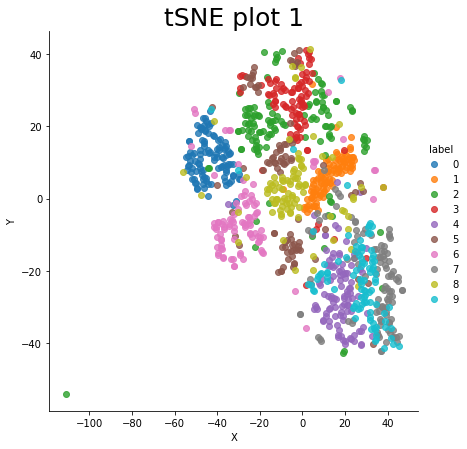

In [ ]:
g = sns.lmplot(x='X',y='Y',data=reduced_tsne1, fit_reg=False,hue='label', size=6)
plt.title("tSNE plot 1",size=25)

The various colours denote the various digits like 0,1,2,3,4...etc.
Points corresponding to same digit are clustered together.

We have applied model 2 below with increased perplexity and number of iterations to improve accuracy.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'tSNE plot 2')

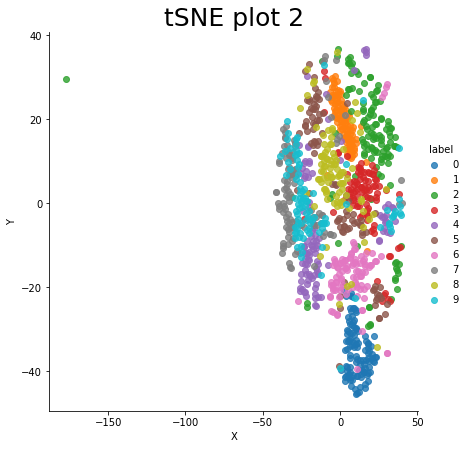

In [ ]:
g = sns.lmplot(x='X',y='Y',data=reduced_tsne2, fit_reg=False,hue='label', size=6)
plt.title("tSNE plot 2",size=25)

We observe that the images corresponding to the different digits are separated into different clusters of points. For example, all the orange points are clustered together that represent 1.

# PCA

Steps followed:
1. Loading data
2. Standardisation of data
3. Applying and fitting the model
4. Plotting the model

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/train.csv')
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(42000, 785)

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(standardized_data)
print(X)

[[-5.01289027 -5.49742121]
 [19.33137582  6.01944531]
 [-7.53571699 -1.96027846]
 ...
 [ 0.34916295  7.5526907 ]
 [ 2.29499962 -4.2831471 ]
 [-4.90023879  1.6955965 ]]


In [ ]:
label = df.label
data = np.vstack((X.transpose(), label)).transpose()
data = pd.DataFrame(data=data, columns=['1', '2','label'])
data.head()

,1,2,label
0,-5.012890,-5.497421,1.0
1,19.331376,6.019445,0.0
2,-7.535717,-1.960278,1.0
3,-0.477542,5.716331,4.0
4,26.602709,6.049892,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PCA')

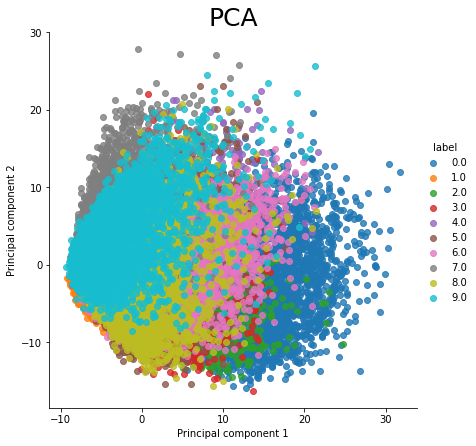

In [ ]:
g = sns.lmplot(x='1',y='2',data=data,fit_reg=False ,hue='label', size=6)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA",size=25)

PCA converts the correlations or lackof correlations into a 2D plot.
The points that are highly correlated cluster together.The 2 axes are ranked in order of importance. Thus differences among the Principal component 1 are more important than PC 2.
Interpretation -
The clustered groups show the various digits.
The blue cluster label 0 is near label 8 on principal component 1 since 0 and 8 are similar. Then 8 is near 6. And similarly, the distances vary according to the correlation between them.

tSNE gives a better visualisation compared to PCA.

# Variational Autoencoder


Reference : www.kaggle.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from scipy.stats import norm

import keras
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K   

K.clear_session()

np.random.seed(237)

Using TensorFlow backend.


In [ ]:
test_orig = pd.read_csv('/drive/My Drive/Colab Notebooks/test.csv')
train_orig = pd.read_csv('/drive/My Drive/Colab Notebooks/train.csv')
train_orig.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Combining traing and testing data maintaing the order and then separating it randomly into validation data.

In [ ]:
test_orig['label'] = 11
testCols = test_orig.columns.tolist()
testCols = testCols[-1:] + testCols[:-1]
test_orig = test_orig[testCols]

In [ ]:
combined = pd.concat([train_orig, test_orig], ignore_index = True)
combined.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
valid = combined.sample(n = 5000, random_state = 555)
train = combined.loc[~combined.index.isin(valid.index)]
valid.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10099,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57209,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,180,253,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2947,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = train.drop(['label'], axis = 1)
X_valid = valid.drop(['label'], axis = 1)

# labels
y_train = train['label']
y_valid = valid['label']

# Normalize and reshape into 28 x 28
X_train = X_train.astype('float32') / 255.
X_train = X_train.values.reshape(-1,28,28,1)

X_valid = X_valid.astype('float32') / 255.
X_valid = X_valid.values.reshape(-1,28,28,1)

In [ ]:
img_shape = (28, 28, 1)    # for MNIST
batch_size = 32
latent_dim = 2  

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = keras.Input(shape=img_shape)
#relu function - f(x)=max(0,x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same',activation='relu')(x)

shape_before_flattening = K.int_shape(x)

In [ ]:

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)

In [ ]:
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

In [ ]:
decoder_input = layers.Input(K.int_shape(z)[1:])

# Expand to 784 total pixels
x = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)

# reshape
x = layers.Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same', activation='sigmoid')(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)

In [ ]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [ ]:
# VAE model statement
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))


In [ ]:
vae.fit(x=X_train, y=None, shuffle=True, epochs=5, batch_size=batch_size,validation_data=(X_valid, None))

Train on 65000 samples, validate on 5000 samples
Epoch 1/5
65000/65000 [==============================] - 342s 5ms/step - loss: 0.2612 - val_loss: 0.1960
Epoch 2/5
65000/65000 [==============================] - 342s 5ms/step - loss: 0.1924 - val_loss: 0.1952
Epoch 3/5
65000/65000 [==============================] - 339s 5ms/step - loss: 0.1877 - val_loss: 0.1898
Epoch 4/5
65000/65000 [==============================] - 342s 5ms/step - loss: 0.1850 - val_loss: 0.1891
Epoch 5/5
65000/65000 [==============================] - 341s 5ms/step - loss: 0.1833 - val_loss: 0.1840


In [ ]:
valid_noTest = valid[valid['label'] != 11]

# X's and Y's
X_valid_noTest = valid_noTest.drop('label', axis=1)
y_valid_noTest = valid_noTest['label']

# Reshape and normalize
X_valid_noTest = X_valid_noTest.astype('float32') / 255.
X_valid_noTest = X_valid_noTest.values.reshape(-1,28,28,1)

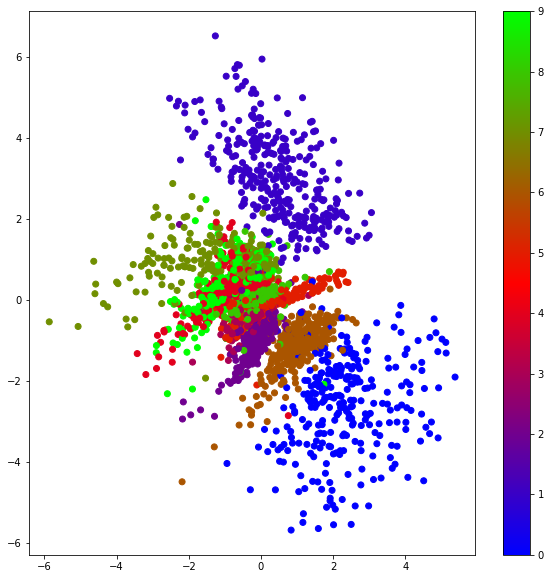

In [ ]:
encoder = Model(input_img, z_mu)
x_valid_noTest_encoded = encoder.predict(X_valid_noTest, batch_size=batch_size)
plt.figure(figsize=(10, 10))
plt.scatter(x_valid_noTest_encoded[:, 0], x_valid_noTest_encoded[:, 1], c=y_valid_noTest, cmap='brg')
plt.colorbar()
plt.show()

validnotest takes the values that are in combined dataframe with label not equal to 11 which means that it excludes the test data(we know this since we explicitly added label 11 in test data earlier.)
Now, it plots the higher dimensional space into a 2D scatter plot denoting the various digits. The colorbar from 0 to 9 is actually the variuos digits from MNIST dataset that is the input.

It can be clearly seen how same digits cluster together.

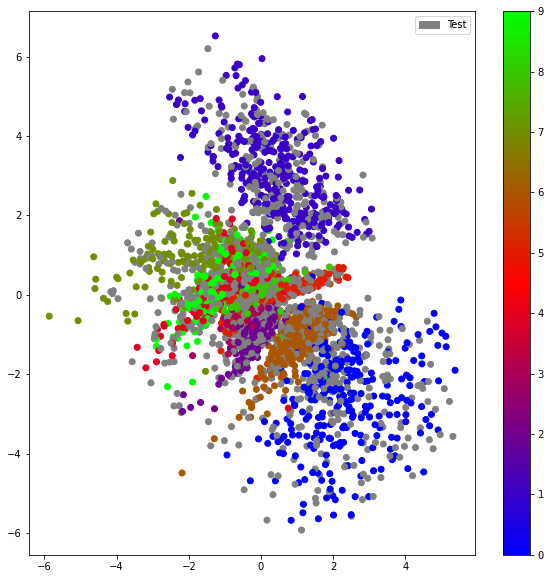

In [ ]:
custom_cmap = matplotlib.cm.get_cmap('brg')
custom_cmap.set_over('gray')

x_valid_encoded = encoder.predict(X_valid, batch_size=batch_size)
plt.figure(figsize=(10, 10))
gray_marker = mpatches.Circle(4,radius=0.1,color='gray', label='Test')
plt.legend(handles=[gray_marker])
plt.scatter(x_valid_encoded[:, 0], x_valid_encoded[:, 1], c=y_valid, cmap=custom_cmap)
plt.clim(0, 9)
plt.colorbar()

Now all the data is included and the test variables are color coded gray.
Again a 2D plot of higher dimensional space is plotted using the encoder and it is understood that clustering of points denote representation of same digits.

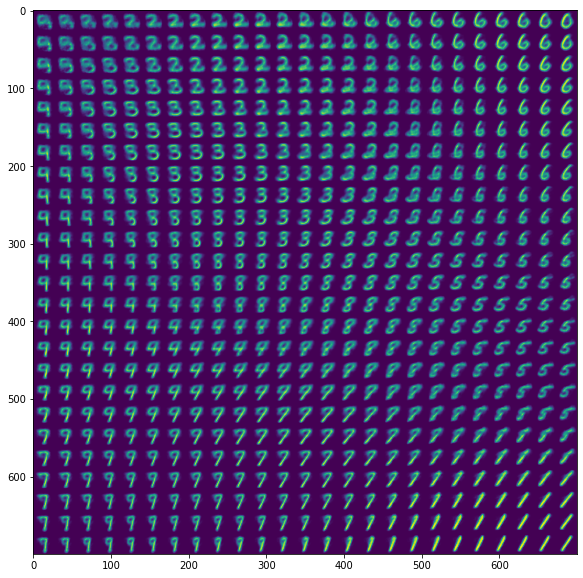

In [ ]:
n = 25  # 25x25 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

# decode for each square in the grid
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()  

We use the decoder to look at the samples and how each digit tranforms into another. This also shows the correlation of digits which we talked about in PCA.